In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
import pandas as pd
dataset = pd.read_excel('HealthCareData.xlsx')
dataset.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [3]:
dataset.shape

(950, 42)

In [4]:
dataset.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [5]:
dataset.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isnull().sum()

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [8]:
categorical_features = dataset.select_dtypes(include=[object])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

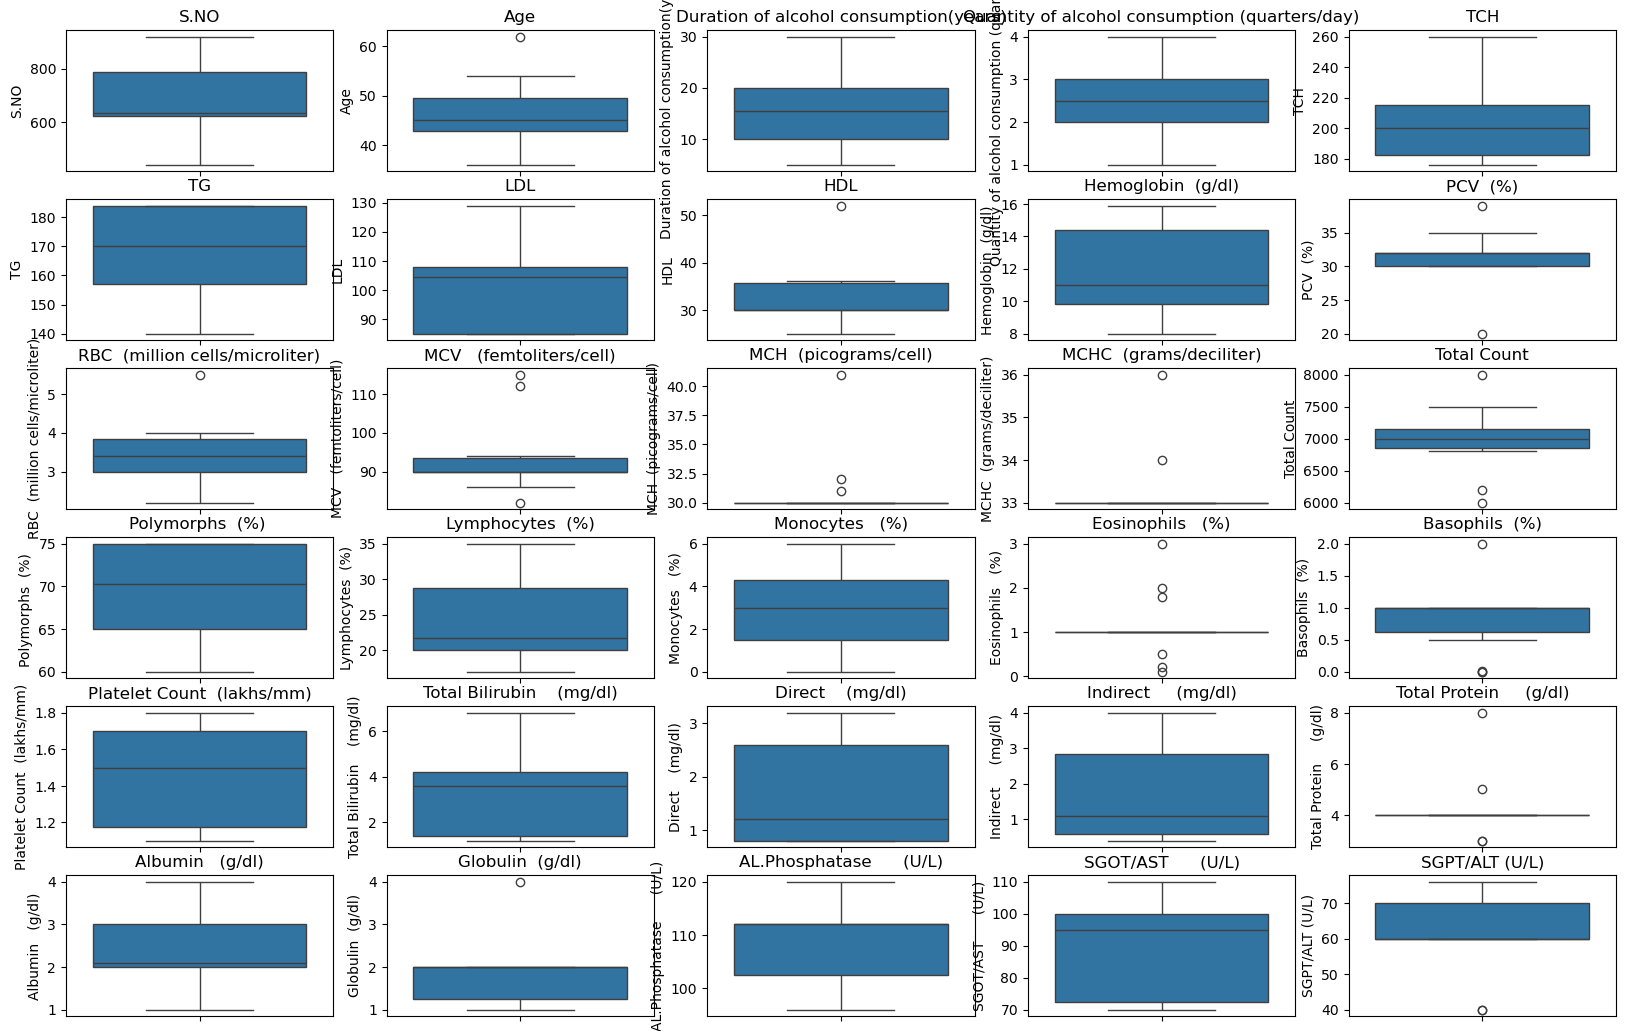

In [9]:
c=0
plt.figure(figsize=(20,15))  # Set figure size

for i in dataset.columns:         # Loop through all columns in the DataFrame
    if type(dataset[i].iloc[0]) != str:     # Only consider numeric (non-string) columns
        plt.subplot(7, 5, c+1)     # Arrange plots in a 7x5 grid
        sns.boxplot(dataset[i])        # Create a boxplot using seaborn
        plt.title(i)              # Set the title of each plot as the column name
        c += 1

plt.show()  # Show all the boxplots

In [10]:
print(dataset.columns)

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [11]:
print(dataset.isnull().sum())

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [13]:
print(dataset.isnull().sum())

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [14]:
# Reload the original dataset as dropping rows removed columns with all missing values
dataset_original = pd.read_excel('HealthCareData.xlsx')

In [15]:
# Identify columns with missing values
missing_values = dataset_original.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
['Place(location where the patient lives)', 'TCH', 'TG', 'LDL', 'HDL', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']


In [16]:
# Identify numerical and categorical columns with missing values
numerical_cols_with_missing = dataset_original.select_dtypes(include=np.number).columns[dataset_original.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_missing = dataset_original.select_dtypes(include='object').columns[dataset_original.select_dtypes(include='object').isnull().any()].tolist()

print("Numerical columns with missing values to impute with median:")
print(numerical_cols_with_missing)
print("\nCategorical columns with missing values to impute with mode:")
print(categorical_cols_with_missing)

Numerical columns with missing values to impute with median:
['TCH', 'HDL', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)']

Categorical columns with missing values to impute with mode:
['Place(location where the patient lives)', 'TG', 'LDL', 'A/G Ratio', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']


In [17]:
# Implement median imputation for numerical columns
for col in numerical_cols_with_missing:
    median_value = dataset_original[col].median()
    dataset_original[col].fillna(median_value, inplace=True)

# Implement mode imputation for categorical columns
for col in categorical_cols_with_missing:
    mode_value = dataset_original[col].mode()[0] # mode() can return multiple values if there's a tie, so take the first one
    dataset_original[col].fillna(mode_value, inplace=True)

C:\Users\ynmad\AppData\Local\Temp\ipykernel_27388\1072195821.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_original[col].fillna(median_value, inplace=True)
C:\Users\ynmad\AppData\Local\Temp\ipykernel_27388\1072195821.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [18]:
# Verify that there are no more missing values
print("Missing values after imputation:")
print(dataset_original.isnull().sum().sum())

Missing values after imputation:
0


In [19]:
q1 = dataset_original['Eosinophils   (%)'].quantile(0.25)
q3 = dataset_original['Eosinophils   (%)'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

dataset_original['Eosinophils   (%)'] = np.where(dataset_original['Eosinophils   (%)'] > upper_limit, upper_limit,
                        np.where(dataset_original['Eosinophils   (%)'] < lower_limit, lower_limit,
                                 dataset_original['Eosinophils   (%)']))

In [20]:
print(dataset_original.columns)

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [21]:
# Find the exact column name for 'Basophils (%)' by searching the columns list
correct_basophils_col_name = None
for col in dataset_original.columns:
    # Use a broad match in case of subtle differences
    if 'Basophils' in col and '%' in col:
        correct_basophils_col_name = col
        break

if correct_basophils_col_name:
    print(f"Found the correct column name: '{correct_basophils_col_name}'")

    # Apply outlier handling using the correct column name
    q1 = dataset_original[correct_basophils_col_name].quantile(0.25)
    q3 = dataset_original[correct_basophils_col_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    dataset_original[correct_basophils_col_name] = np.where(dataset_original[correct_basophils_col_name] > upper_limit, upper_limit,
                           np.where(dataset_original[correct_basophils_col_name] < lower_limit, lower_limit,
                                    dataset_original[correct_basophils_col_name]))

    print(f"Outlier handling applied to '{correct_basophils_col_name}'.")
else:
    print("Could not find a column similar to 'Basophils (%)'. Please check the column names.")

Found the correct column name: 'Basophils  (%)'
Outlier handling applied to 'Basophils  (%)'.


In [22]:
# Identify all numerical columns
numerical_cols = dataset_original.select_dtypes(include=np.number).columns.tolist()

# Remove the 'S.NO' column as it's likely an identifier and not a feature for outlier analysis
if 'S.NO' in numerical_cols:
    numerical_cols.remove('S.NO')

print("Applying outlier handling to the following numerical columns:")
print(numerical_cols)

# Apply outlier handling using the IQR method to all numerical columns
for col in numerical_cols:
    print(f"Handling outliers in column: {col}")
    q1 = dataset_original[col].quantile(0.25)
    q3 = dataset_original[col].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    dataset_original[col] = np.where(dataset_original[col] > upper_limit, upper_limit,
                                   np.where(dataset_original[col] < lower_limit, lower_limit,
                                            dataset_original[col]))

Applying outlier handling to the following numerical columns:
['Age', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'TCH', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)']
Handling outliers in column: Age
Handling outliers in column: Duration of alcohol consumption(years)
Handling outliers in column: Quantity of alcohol consumption (quarters/day)
Handling outliers in column: TCH
Handling outliers in column: HDL
Handling outliers in column: Hemoglobin  (g/dl)
Handling outliers in column: PCV  (%)
Handling outliers in

In [23]:
# Identify categorical columns
categorical_cols = dataset_original.select_dtypes(include='object').columns.tolist()

print("Categorical columns to be one-hot encoded:")
print(categorical_cols)

# Apply one-hot encoding
dataset_encoded = pd.get_dummies(dataset_original, columns=categorical_cols, drop_first=True) # drop_first=True avoids multicollinearity

Categorical columns to be one-hot encoded:
['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL', 'Total Bilirubin    (mg/dl)', 'A/G Ratio', 'USG Abdomen (diffuse liver or  not)', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']


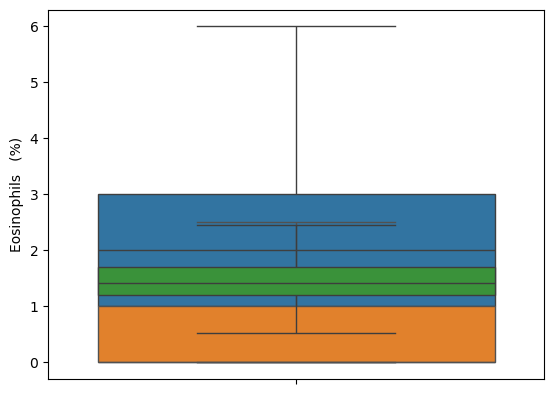

In [24]:
# Get the exact column names from the DataFrame columns
eosinophils_col = None
basophils_col = None
platelet_col = None

for col in dataset_original.columns:
    if 'Eosinophils' in col and '%' in col:
        eosinophils_col = col
    elif 'Basophils' in col and '%' in col:
        basophils_col = col
    elif 'Platelet Count' in col and '(lakhs/mm)' in col:
        platelet_col = col

# Plot boxplots using the exact column names
if eosinophils_col:
    sns.boxplot(dataset_original[eosinophils_col])
if basophils_col:
    sns.boxplot(dataset_original[basophils_col])
if platelet_col:
    sns.boxplot(dataset_original[platelet_col])

# Display the plots
plt.show()

<Axes: ylabel='Eosinophils   (%)'>

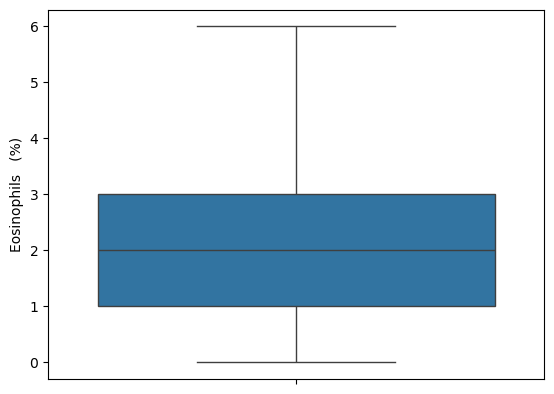

In [25]:
q1 = dataset_original['Eosinophils   (%)'].quantile(0.25)
q3 = dataset_original['Eosinophils   (%)'].quantile(0.75)
iqr = q3 - q1
q1, q3, iqr

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

dataset_original['Eosinophils   (%)'] = np.where(dataset_original['Eosinophils   (%)'] > upper_limit, upper_limit,
                             np.where(dataset_original['Eosinophils   (%)'] < lower_limit, lower_limit,
                                      dataset_original['Eosinophils   (%)']))
sns.boxplot(dataset_original['Eosinophils   (%)'])

Handling outliers in column: 'Basophils  (%)'


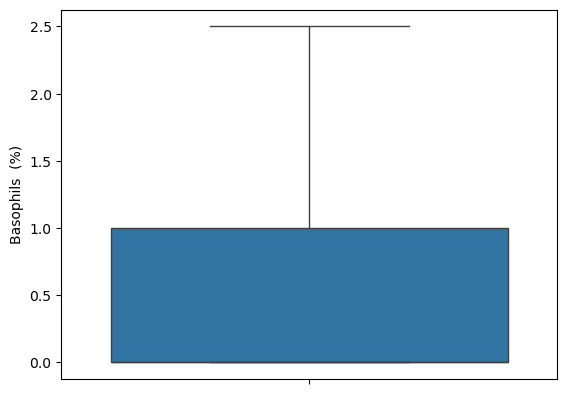

In [26]:
# Get the exact column name for 'Basophils (%)'
basophils_col = None
for col in dataset_original.columns:
    if 'Basophils' in col and '%' in col:
        basophils_col = col
        break

if basophils_col:
    print(f"Handling outliers in column: '{basophils_col}'")
    q1 = dataset_original[basophils_col].quantile(0.25)
    q3 = dataset_original[basophils_col].quantile(0.75)
    iqr = q3 - q1
    q1, q3, iqr

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    lower_limit, upper_limit

    dataset_original[basophils_col] = np.where(dataset_original[basophils_col] > upper_limit, upper_limit,
                                   np.where(dataset_original[basophils_col] < lower_limit, lower_limit,
                                            dataset_original[basophils_col]))
    sns.boxplot(dataset_original[basophils_col])
else:
    print("Could not find a column similar to 'Basophils (%)'. Please check the column names.")

<Axes: ylabel='Platelet Count  (lakhs/mm)'>

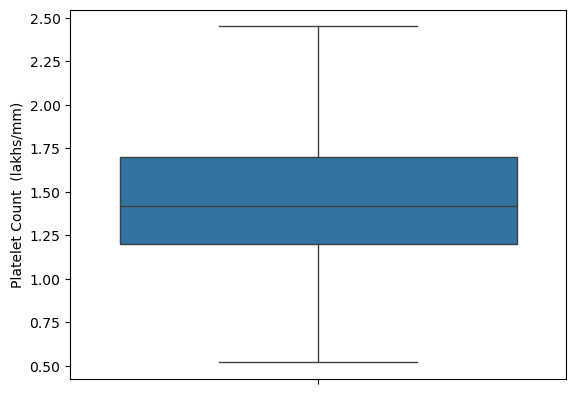

In [27]:
sns.boxplot(dataset_original['Platelet Count  (lakhs/mm)'])

In [28]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train
# ...

x_test
# ...

y_train
# ...

y_test
# ...


NameError: name 'x' is not defined

In [29]:
# Separate features (X) and target (y)
# Assuming 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)_no' is the target variable after one-hot encoding
target_col = 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)_no'

if target_col in dataset_encoded.columns:
    X = dataset_encoded.drop(columns=[target_col])
    y = dataset_encoded[target_col]
else:
    print(f"Target column '{target_col}' not found in the dataset.")
    X = None
    y = None

if X is not None and y is not None:
    print("Features (X) and target (y) separated.")
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

Features (X) and target (y) separated.
Shape of X: (950, 252)
Shape of y: (950,)


In [30]:
dataset_original.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.0,950.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,475.500000,50.614737,20.603684,2.202632,194.781053,34.743158,10.270295,33.968632,3.5,87.497895,...,0.457053,1.451621,3.722579,2.413789,5.620842,2.548316,3.215632,132.497895,80.489474,59.791579
std,274.385677,8.753533,7.973021,0.822012,10.939457,3.265529,1.884459,5.294891,0.0,13.418980,...,0.636897,0.393631,1.590711,0.934994,1.265647,0.870021,0.999405,27.318700,26.934205,24.929642
min,1.000000,32.000000,4.000000,1.000000,175.000000,28.500000,5.250000,20.500000,3.5,60.000000,...,0.000000,0.520000,0.800000,0.500000,2.900000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,190.000000,33.000000,9.000000,31.000000,3.5,78.000000,...,0.000000,1.200000,2.700000,2.000000,5.000000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.5,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,200.000000,36.000000,11.500000,38.000000,3.5,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,76.500000,42.500000,4.500000,215.000000,40.500000,15.250000,48.000000,3.5,118.000000,...,2.500000,2.450000,6.450000,4.500000,8.300000,4.500000,6.250000,206.000000,151.500000,128.500000


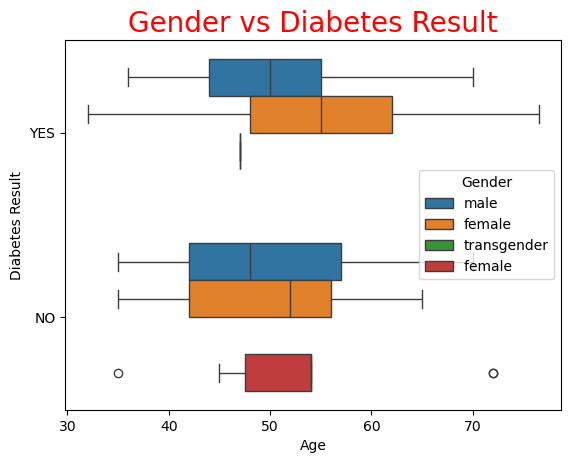

In [31]:
sns.boxplot(x='Age', y='Diabetes Result', data=dataset_original, hue='Gender')
plt.title('Gender vs Diabetes Result', color='red', size=20)
plt.show()


<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

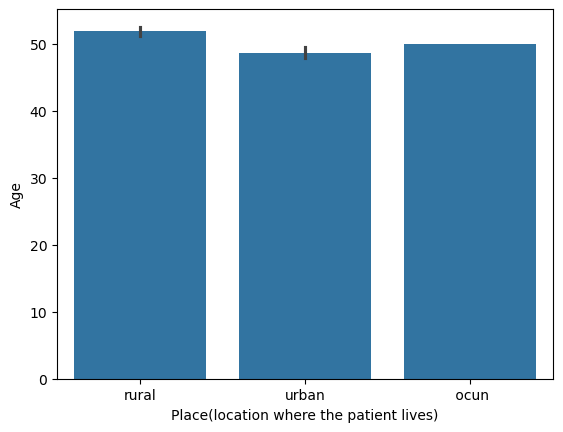

In [32]:
sns.barplot(x=dataset_original['Place(location where the patient lives)'], y=dataset_original['Age'])


Text(0.5, 1.0, 'Place vs Age')

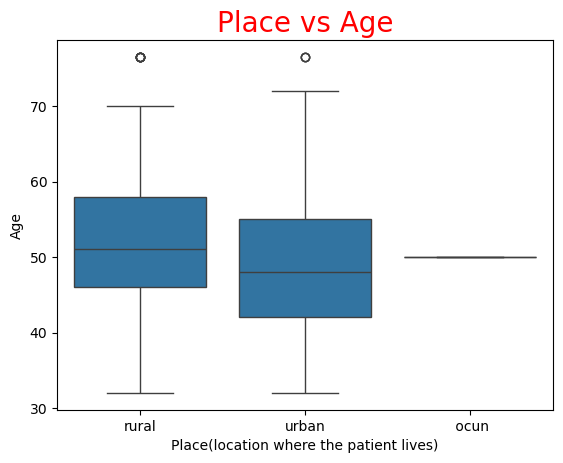

In [33]:
sns.boxplot(x='Place(location where the patient lives)', y='Age', data=dataset_original)
plt.title('Place vs Age', color='red', size=20)


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

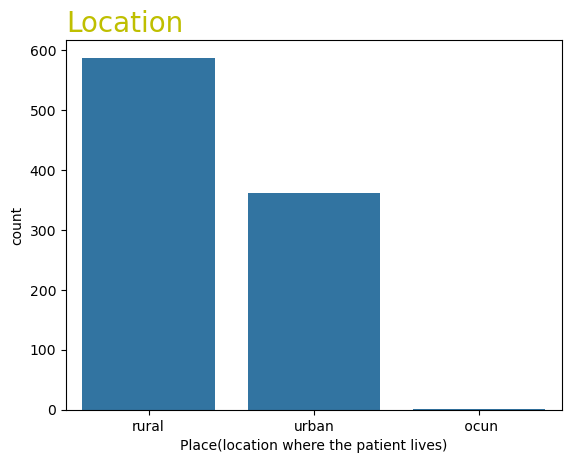

In [35]:
sns.countplot(data=dataset_original, x='Place(location where the patient lives)')
plt.title('Location', color='y', size=20, loc='left')
plt.show()

In [39]:
# Identify categorical columns
categorical_cols = dataset_original.select_dtypes(include='object').columns.tolist()

print("Categorical columns to be one-hot encoded:")
print(categorical_cols)

# Apply one-hot encoding
dataset_encoded = pd.get_dummies(dataset_original, columns=categorical_cols, drop_first=True) # drop_first=True avoids multicollinearity

Categorical columns to be one-hot encoded:
['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL', 'Total Bilirubin    (mg/dl)', 'A/G Ratio', 'USG Abdomen (diffuse liver or  not)', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']


In [40]:
# Separate features (X) and target (y)
# Assuming 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)_no' is the target variable after one-hot encoding
target_col = 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)_no'

if target_col in dataset_encoded.columns:
    X = dataset_encoded.drop(columns=[target_col])
    y = dataset_encoded[target_col]
else:
    print(f"Target column '{target_col}' not found in the dataset.")
    X = None
    y = None

if X is not None and y is not None:
    print("Features (X) and target (y) separated.")
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

Features (X) and target (y) separated.
Shape of X: (950, 252)
Shape of y: (950,)


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [44]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
logistic = log.fit(x_train, y_train)



In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print("X_Train:", x_train)
print("Y_Train:", y_train)


X_Train:      S.NO   Age  Duration of alcohol consumption(years)  \
936   937  72.0                                     4.0   
290   291  52.0                                    12.0   
544   545  38.0                                    24.0   
275   276  60.0                                    10.0   
109   110  50.0                                    15.0   
..    ...   ...                                     ...   
106   107  54.0                                    20.0   
270   271  60.0                                    10.0   
860   861  57.0                                    25.0   
435   436  55.0                                    20.0   
102   103  52.0                                    20.0   

     Quantity of alcohol consumption (quarters/day)    TCH   HDL  \
936                                             3.0  194.0  35.0   
290                                             1.0  180.0  35.0   
544                                             3.0  194.0  35.0   
275       

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np

# Randomly choose values for k (number of neighbors)
k = np.random.randint(1, 50, 60)  # 60 random values from 1 to 49

# Set the parameter grid
params = {'n_neighbors': k}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 6, 49, 16, 23, 41, 15,  7, 27, 36,  2, 13, 14, 45, 25, 12, 17, 27,
       44, 30, 48, 48, 14, 48,  1, 42, 41, 28,  8, 27,  3, 27, 44, 49, 15,
       33,  6, 22, 36, 39, 48, 44, 43, 27,  7, 26, 19, 11, 45,  6, 38, 16,
       16, 43, 46, 13, 45, 39, 22, 47, 26])})

In [47]:
print('train_score = ' + str(random_search.score(x_train, y_train)))
print('test_score = ' + str(random_search.score(x_test, y_test)))


train_score = 1.0
test_score = 1.0


In [48]:
print(np.intersect1d(x_train, x_test).size)  # Should be 0 or very small


337


In [49]:
from sklearn.metrics import confusion_matrix

y_pred = random_search.predict(x_test)
print(confusion_matrix(y_test, y_pred))


[[187   0]
 [  0   3]]


In [50]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.97368421]
Average CV score: 0.9947368421052631


In [51]:
print('train_score = ' + str(random_search.score(x_train, y_train)))
print('test_score = ' + str(random_search.score(x_test, y_test)))


train_score = 1.0
test_score = 1.0


In [52]:
import numpy as np
print(np.intersect1d(x_train, x_test).size)  # Should be close to 0


337


In [53]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


In [54]:
print(np.intersect1d(x_train, x_test).size)  # Should be 0 or very close to 0


337


In [55]:
import pandas as pd
import numpy as np

# If X is a DataFrame
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Merge to find overlapping rows
overlap = pd.merge(x_train_df, x_test_df)

print(f"Number of overlapping samples: {len(overlap)}")


Number of overlapping samples: 0


In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.97368421]
Average CV score: 0.9947368421052631


In [57]:
print('train_score = ' + str(random_search.score(x_train, y_train)))
print('test_score = ' + str(random_search.score(x_test, y_test)))

train_score = 1.0
test_score = 1.0


In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Use the best estimator from the random search for prediction
y_pred = random_search.best_estimator_.predict(x_test)

print("Evaluating the best KNN model from RandomizedSearchCV:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Evaluating the best KNN model from RandomizedSearchCV:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       187
        True       1.00      1.00      1.00         3

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 5, 'n_estimators': 50}
Best score: 1.0
